# Выявление факторов, влияющих на успешность компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Этапы анализа

1. [Открытие файла с данными и изучение общей информации](#one)
2. [Подготовка данных](#two)
3. [Исследовательский анализ данных](#three)
4. [Портрет пользователя каждого региона](#four)
5. [Проверка гипотез](#five)
6. [Общий вывод](#six)

## 1. Открытие файла с данными и изучение общей информации  <a id="one"></a>

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

# Настройка отображения результатов
pd.set_option('precision', 3)
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None

# Открытие файла с данными
df = pd.read_csv('games.csv')

# Ознакомление с данными
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных**

*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы долларов)
*	EU_sales — продажи в Европе (миллионы долларов)
*	JP_sales — продажи в Японии (миллионы долларов)
*	Other_sales — продажи в других странах (миллионы долларов)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Объем выборки: 16715 игр для различных платформ. При этом данные нуждаются в предобработке в связи с наличием как пропущенных переменных, так и некорректных типов данных.

## 2. Подготовка данных <a id="two"></a>

In [2]:
# Приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [3]:
# Анализ пропусков
nulls = pd.DataFrame(columns=['column_name'], data=df.columns)
nulls['nulls'] = df.isnull().sum().values
nulls['nulls_percentage'] = nulls['nulls'] / df.shape[0] * 100
nulls

,column_name,nulls,nulls_percentage
0,name,2,0.012
1,platform,0,0.000
2,year_of_release,269,1.609
3,genre,2,0.012
4,na_sales,0,0.000
5,eu_sales,0,0.000
6,jp_sales,0,0.000
7,other_sales,0,0.000
8,critic_score,8578,51.319
9,user_score,6701,40.090


In [4]:
# Восстановление пропусков в переменной "year_of_release"
df['year_of_release'] = df. groupby(['name'])['year_of_release'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [5]:
# Восстановление пропусков в переменной "rating"
df['rating'] = df. groupby(['name'])['rating'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [6]:
nulls2 = pd.DataFrame(columns=['column_name'], data=df.columns)
nulls2['nulls'] = df.isnull().sum().values
nulls2['nulls_percentage'] = nulls['nulls'] / df.shape[0] * 100
nulls2

,column_name,nulls,nulls_percentage
0,name,2,0.012
1,platform,0,0.000
2,year_of_release,148,1.609
3,genre,2,0.012
4,na_sales,0,0.000
5,eu_sales,0,0.000
6,jp_sales,0,0.000
7,other_sales,0,0.000
8,critic_score,8578,51.319
9,user_score,6701,40.090


In [7]:
# Преобразование данных в нужные типы
#df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
#df['year_of_release'] = df['year_of_release'].dt.year
df['year_of_release'] = df['year_of_release'].fillna(999).astype('int')
df['year_of_release'] = df['year_of_release'].replace(999, None)

In [8]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.7       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [9]:
df['user_score'] = df['user_score'].replace('tbd', None)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [10]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [11]:
# Подсчет суммарных продаж по всем регионам
df['sales_sum'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Подготовка данных для дальнейшего анализа включает в себя следующие этапы:    
    
1. Замена названий столбцов (приведение к нижнему регистру)
 
    
2. Анализ пропусков в данных
    
По возможности (при наличии в датафрейме информации об игре) заполнены данные в переменных "year_of_release" и "rating". Заполенение пропусков в переменных" critic_score" и "user_score" нецелесообразно, так как оно может привести к смещению оценок и искажению результатов анализа (одна игра, выпущенная на разных платформах, может иметь различные оценки).
    
3. Преобразование данных в нужные типы

Ознакомление с представленными данными показало, что в столбце, содержащем информацию о годе релиза игры, данные имеют тип "float". Для удобства дальнейшего анализа данные переведены в целочисленный формат.

Из-за наличия значений "tbd" (TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)) в столбце с оценками пользователей данные имеют формат "object". Для перевода в числовой тип предварительное значение "tbd" заменено на пропуски.
    
    
4. Расчет и добавление в датафрейм суммарных продаж игр во всех регионах

## 3. Исследовательский анализ данных <a id="three"></a>

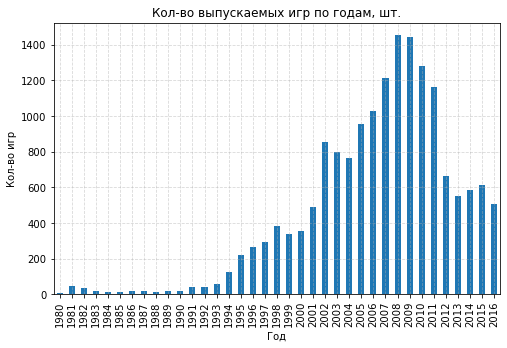

In [12]:
# Кол-во выпускаемых игр по годам
(df
    .pivot_table(index='year_of_release', values='platform', aggfunc='count')
    .plot(kind='bar', title='Кол-во выпускаемых игр по годам, шт.', legend=False, figsize=(8, 5)))
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel("Год")
plt.ylabel("Кол-во игр")
plt.show()

In [13]:
# Динамика объемов продаж по топовым платформам
top10_platform_alltime = df.groupby('platform')['sales_sum'].agg('sum').nlargest(10)
top10_platform_alltime

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sales_sum, dtype: float64

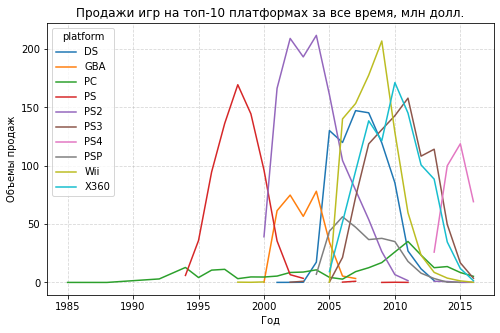

In [14]:
(df
 .query('platform in @top10_platform_alltime.index')
 .pivot_table(index='year_of_release', columns ='platform', values='sales_sum', aggfunc='sum')
 .plot(label=['platform'], figsize=(8, 5), title='Продажи игр на топ-10 платформах за все время, млн долл.'))

plt.grid(linestyle='--', alpha=0.5)
plt.xlabel("Год")
plt.ylabel("Объемы продаж")
plt.show()

In [15]:
# Выделение актуальных данных
df1 = df.query('2011 < year_of_release <= 2016')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2928 non-null   object 
 1   platform         2928 non-null   object 
 2   year_of_release  2928 non-null   int32  
 3   genre            2928 non-null   object 
 4   na_sales         2928 non-null   float64
 5   eu_sales         2928 non-null   float64
 6   jp_sales         2928 non-null   float64
 7   other_sales      2928 non-null   float64
 8   critic_score     1337 non-null   float64
 9   user_score       1606 non-null   float64
 10  rating           1793 non-null   object 
 11  sales_sum        2928 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 285.9+ KB


In [16]:
# Анализ динамики продаж на крупнейших платформ
top_platform = df1.groupby('platform')['sales_sum'].agg('sum').nlargest(10)
top_platform 

platform
PS4     314.14
PS3     292.70
X360    237.57
3DS     195.01
XOne    159.32
WiiU     82.19
PC       63.52
PSV      49.18
Wii      37.25
DS       13.38
Name: sales_sum, dtype: float64

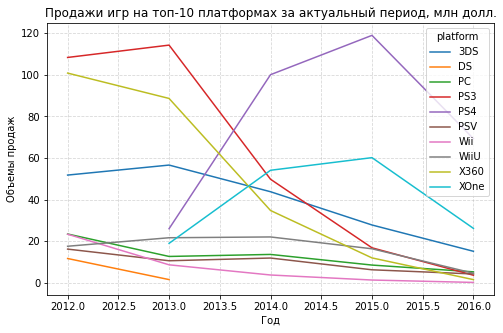

In [17]:
(df1
 .query('platform in @top_platform.index')
 .pivot_table(index='year_of_release', columns ='platform', values='sales_sum', aggfunc='sum')
 .plot(label=['platform'], figsize=(8, 5), title='Продажи игр на топ-10 платформах за актуальный период, млн долл.'))

plt.grid(linestyle='--', alpha=0.5)
plt.xlabel("Год")
plt.ylabel("Объемы продаж")
plt.show()

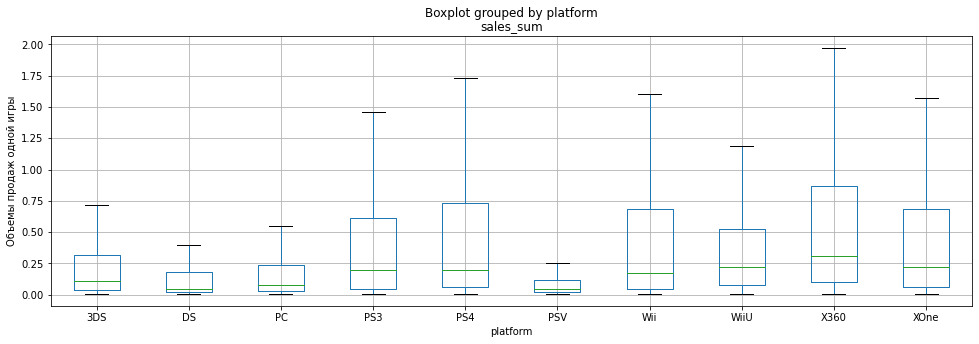

In [18]:
# Диаграммы размаха продажах на топовых платформах
(df1
    .query('platform in @top_platform.index')
    .boxplot('sales_sum', by='platform', showfliers=False, figsize=(16, 5)))

plt.ylabel("Объемы продаж одной игры")
plt.show()

------------------------------------------------ PS4 ------------------------------------------------
Кол-во игр, выпущенных для платформы с 2012 года: 392
Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.03


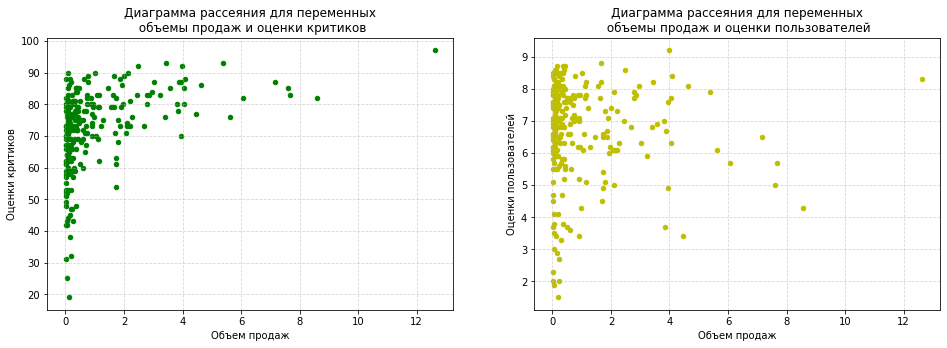

------------------------------------------------ XOne ------------------------------------------------
Кол-во игр, выпущенных для платформы с 2012 года: 247
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценкой пользователей и продажами: -0.07


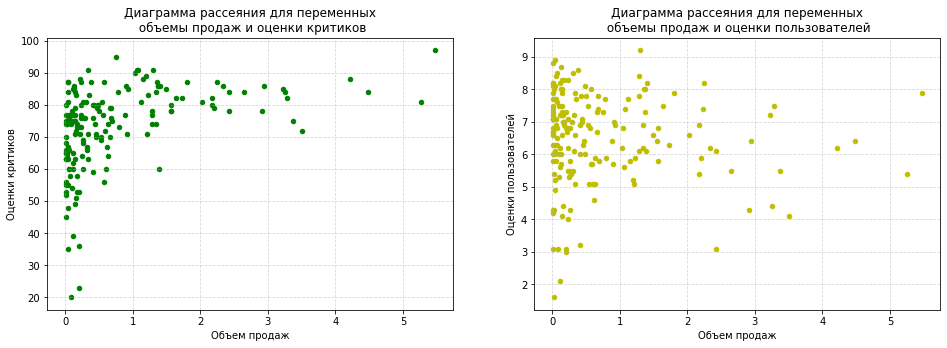

------------------------------------------------ PS3 ------------------------------------------------
Кол-во игр, выпущенных для платформы с 2012 года: 499
Корреляция между оценкой критиков и продажами: 0.33
Корреляция между оценкой пользователей и продажами: -0.01


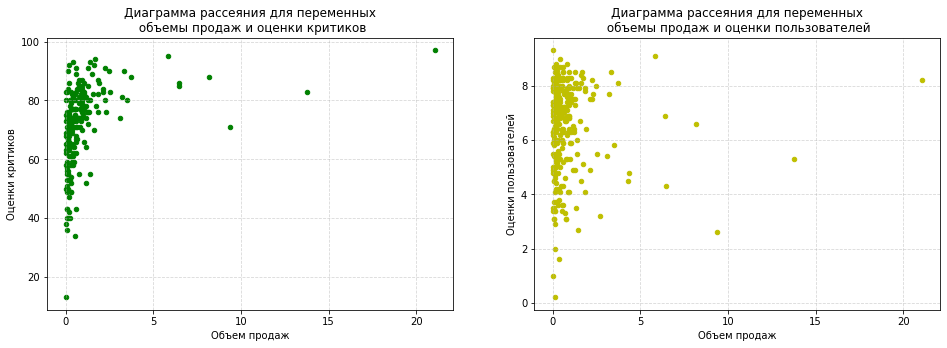

------------------------------------------------ X360 ------------------------------------------------
Кол-во игр, выпущенных для платформы с 2012 года: 295
Корреляция между оценкой критиков и продажами: 0.36
Корреляция между оценкой пользователей и продажами: 0.01


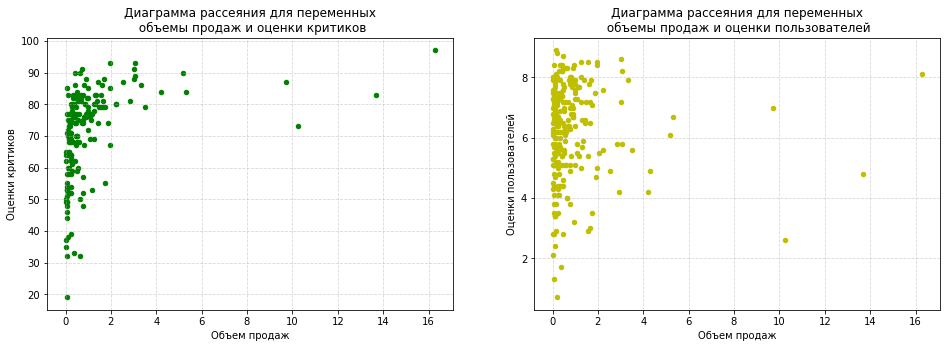

In [19]:
# Влияние рейтингов на продажи игр для конкретной платформы
def reviews_effect(platform_name):
    df_n = df1[df1['platform'] == platform_name]
    print('------------------------------------------------', platform_name,'------------------------------------------------')
    print('Кол-во игр, выпущенных для платформы с 2012 года:', len(df_n))
    print('Корреляция между оценкой критиков и продажами: {:.2f}'.format(df_n['sales_sum'].corr(df_n['critic_score'])))
    print('Корреляция между оценкой пользователей и продажами: {:.2f}'.format(df_n['sales_sum'].corr(df_n['user_score'])))
    
    fig, axs = plt.subplots(1, 2, figsize=(16,5))  
    df_n.plot(x='sales_sum', y='critic_score', kind='scatter', color='g', ax=axs[0], title='Диаграмма рассеяния для переменных\n объемы продаж и оценки критиков')
    axs[0].grid(linestyle='--', alpha=0.5)
    axs[0].set_xlabel("Объем продаж")
    axs[0].set_ylabel("Оценки критиков")
    
    df_n.plot(x='sales_sum', y='user_score', kind='scatter', color='y', ax=axs[1], title='Диаграмма рассеяния для переменных\n объемы продаж и оценки пользователей')
    axs[1].grid(linestyle='--', alpha=0.5)
    axs[1].set_xlabel("Объем продаж")
    axs[1].set_ylabel("Оценки пользователей")
    plt.show()


reviews_effect('PS4')
reviews_effect('XOne')
reviews_effect('PS3')
reviews_effect('X360')

In [20]:
# Распределение игр по жанрам
genres = df1.pivot_table(index='genre', values='sales_sum', aggfunc=['count','sum'])
genres.columns = ['games', 'total_income']
genres['income_per_game'] = genres['total_income'] / genres['games']
genres.sort_values(by = 'total_income', ascending = False)

,games,total_income,income_per_game
genre,,,
Action,1045,447.84,0.429
Shooter,238,304.80,1.281
Role-Playing,374,194.44,0.520
Sports,271,182.06,0.672
Misc,197,87.08,0.442
Platform,87,61.19,0.703
Racing,119,53.63,0.451
Fighting,111,44.73,0.403
Simulation,82,35.31,0.431


* В датафрейме содержится информация о продажах игр с 1980 по 2016 год. До 2008 кол-во выпускаемых игр в год росло практически по экспоненте. Однако после пика 2008-2009 годов, когда ежегодно выпускалось более 1400 новых игр, наблюдается резкое падение. С 2012 года количество ежегодно выпускаемых игр варьируется около 600.

    
*  Высокие темпа развития игровых технологий обуславливают относительно короткие сроки популярности отдельных игровых платформ. Так, смена популярных на рынке игровых платформ происходит примерно раз в 5 лет.
    
Таким образом, для целей прогнозирования спроса на рынке в 2017 году ***нецелесообразно использовать данные до 2012 года***.
    
*	Как правило, платформы sony занимают лидирующие позиции по объемам игровых продаж. Второе место сохраняют за собой приставки Microsoft. На текущий момент на рынке доминируют 2 консоли: PS4 и Xbox One, однако отрицательная динамика объемов продаж на них, заметная с начала 2015 года, свидетельствует о скором выпуске нового поколения приставок.

    
*	Объемы продаж игры в среднем существенно не различаются для разных платформ. Однако распределения объемов продаж по всем платформам скошены вправо, что свидетельствую о наличии большого количества игр с объемами продаж ощутимо больше медианной суммы. При этом для крупных платформ (sony и xbox) разброс значений игровых продаж значительно шире, чем для иных консолей.

    
*	Примечательно, что на всех топовых платформах оценки критиков и игроков, как правило, не оказываю существенного влияния на объемы продаж игры. В то же время игры с большими объемами продаж преимущественно характеризуются также и высокими оценками со стороны критиков.

    
*	Как наиболее прибыльными, так и наиболее распространенными являются игры в жанрах Action, Shooter, Role-Playing	и Sports. При этом шутеры лидируют по показатели объемов продаж на одну игру.


## 4. Портрет пользователя каждого региона <a id="four"></a>

------------------------------------------------ NA ------------------------------------------------
Топ-5 платформ


,platform,na_sales
0,X360,140.57
1,PS4,108.74
2,PS3,105.06
3,XOne,93.12
4,3DS,55.49



Топ-5 жанров


,genre,na_sales
0,Action,180.56
1,Shooter,144.83
2,Sports,82.43
3,Role-Playing,64.31
4,Misc,39.26


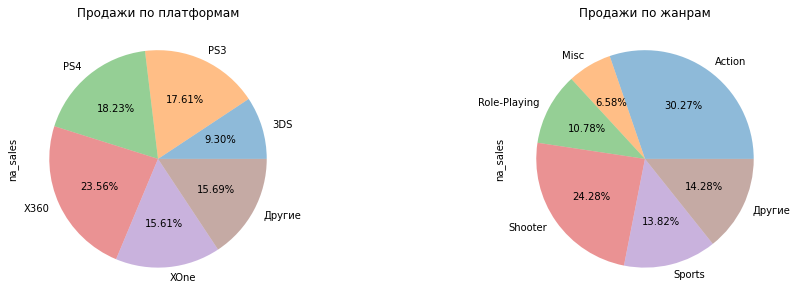

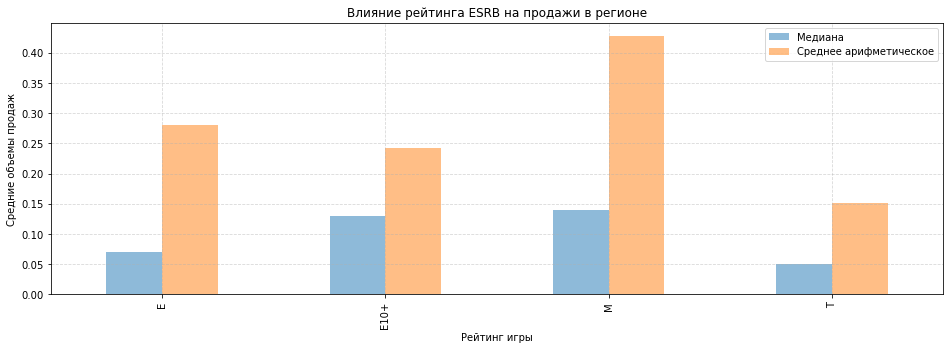

------------------------------------------------ EU ------------------------------------------------
Топ-5 платформ


,platform,eu_sales
0,PS4,141.09
1,PS3,107.95
2,X360,74.93
3,XOne,51.59
4,3DS,42.83



Топ-5 жанров


,genre,eu_sales
0,Action,161.98
1,Shooter,113.48
2,Sports,69.14
3,Role-Playing,48.76
4,Racing,27.33


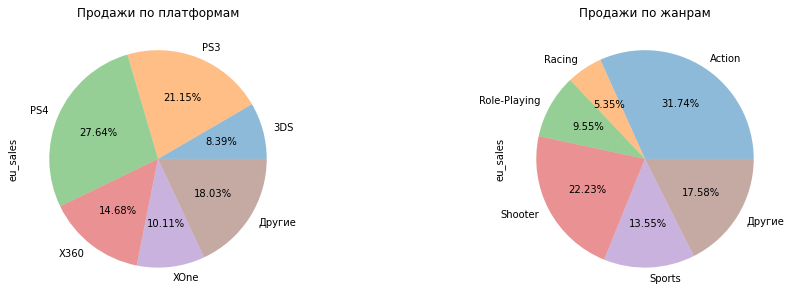

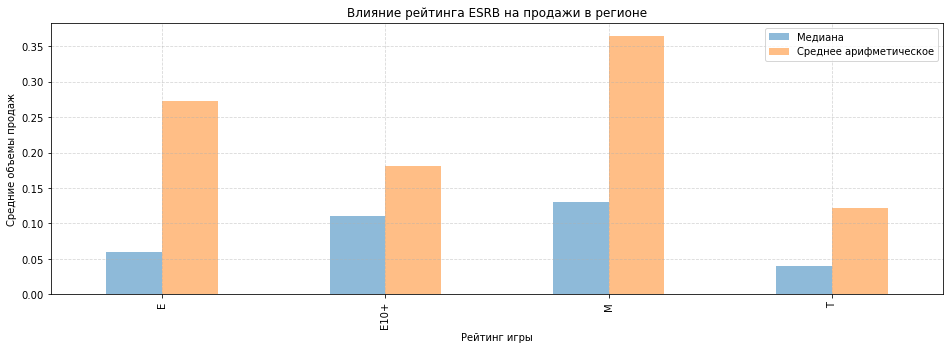

------------------------------------------------ JP ------------------------------------------------
Топ-5 платформ


,platform,jp_sales
0,3DS,87.79
1,PS3,35.95
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01



Топ-5 жанров


,genre,jp_sales
0,Role-Playing,66.46
1,Action,53.43
2,Misc,13.12
3,Simulation,10.43
4,Fighting,9.44


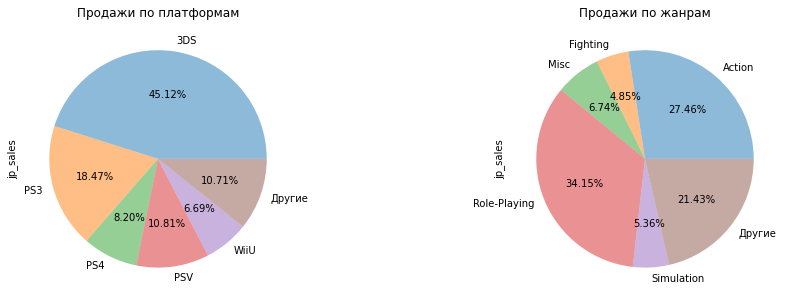

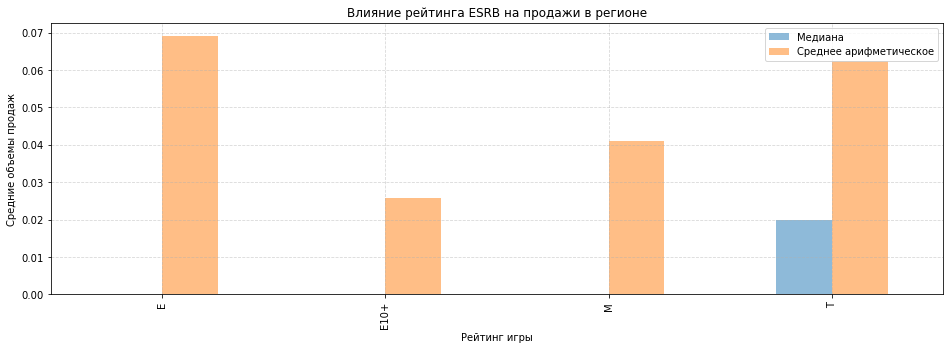

In [21]:
for column_name in df1[['na_sales', 'eu_sales', 'jp_sales']]:
    column = df1[column_name]
    
    print('------------------------------------------------', str(column_name)[:2].upper(), '------------------------------------------------')
    
    print('Топ-5 платформ')
    top_pl = df1.groupby('platform')[column_name].agg('sum').nlargest(5)
    display(top_pl.reset_index())
    print()
    print('Топ-5 жанров')
    top_gn = df1.groupby('genre')[column_name].agg('sum').nlargest(5)
    display(top_gn.reset_index())
    
    df1['pl_top'] = df1['platform'].where(df1['platform'].isin(top_pl.index), 'Другие')
    df1['gn_top'] = df1['genre'].where(df1['genre'].isin(top_gn.index), 'Другие')
    
    fig, axs = plt.subplots(1, 2, figsize=(16,5))  
    
    (df1
     .pivot_table(index='pl_top', values=column_name, aggfunc='sum')
     .plot(kind='pie', y=column_name, ax=axs[0], autopct='%1.2f%%', legend=False, wedgeprops={'alpha':0.5}, title='Продажи по платформам'))
    
    (df1
     .pivot_table(index='gn_top', values=column_name, aggfunc='sum')
     .plot(kind='pie', y=column_name, ax=axs[1], autopct='%1.2f%%', legend=False, wedgeprops={'alpha':0.5}, title='Продажи по жанрам'))
    plt.show()
    
    (df1
        .pivot_table(index='rating', values=column_name, aggfunc=['median', 'mean'])
        .plot(kind='bar', alpha=0.5, title='Влияние рейтинга ESRB на продажи в регионе', figsize=(16,5)))
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel("Рейтинг игры")
    plt.ylabel("Средние объемы продаж")
    plt.legend(['Медиана', 'Среднее арифметическое'])
    plt.show()

In [22]:
# Дополнительный анализ влияния рейтинга ESRB на продажи
df1['rating'].value_counts()

M       566
T       473
E       423
E10+    331
Name: rating, dtype: int64

In [23]:
df1.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['median','mean'])

median                                   mean                    \
       eu_sales jp_sales na_sales other_sales eu_sales jp_sales na_sales   
rating                                                                     
E          0.06     0.00     0.07        0.02    0.273    0.069    0.280   
E10+       0.11     0.00     0.13        0.03    0.181    0.026    0.242   
M          0.13     0.00     0.14        0.04    0.365    0.041    0.428   
T          0.04     0.02     0.05        0.01    0.122    0.062    0.151   

                    
       other_sales  
rating              
E            0.076  
E10+         0.053  
M            0.119  
T            0.042

*	Предпочтения пользователей различный регионов как в отношении платформ, так и в отношении игровых жанров существенно отличаются. Наибольшей спецификой обладает рынок Японии.
    

*	В Европе и Северной Америке в топ-5 популярных платформ, как и в целом по всему миру, входят консоли sony и xbox. Однако в Японии лидирующие позиции на рынке занимает портативная консоль Nintendo 3DS, при этом существенно ниже распространенность xbox (приставки Microsoft даже не входят в топ-5).
      
      
*	Около 60% рынка игр в Европе и Северной Америке приходится на жанры Action, Shooter	и Sports, популярные в целом во всем мире. Жанр Action также весьма популярен в Японии. На ряду с ним японских пользователей привлекают игры жанров Role-Playing и Simulation.	

      
*	В целом, игры, которым присвоен ESRB рейтинг "M", продаются более успешно, однако влияние данного рейтинга на продажи невелико. Так, на рынке Японии соответствующей закономерности не наблюдается. 


*Примечание:*

Pейтинг ESRB ([см. ссылку](http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya))   
    
EC (Early Childhood) — для детей младшего возраста
    
E (Everyone) — для всех
    
E10+ (Everyone 10+) — для всех старше 10 лет
    
T (Teen) — для подростков 13-19 лет
    
M (Mature 17+) — от 17 лет
    
AO (Adults only 18+) — только для взрослых
    
RP (Rating pending) — рейтинг ожидается

## 5. Проверка гипотез <a id="five"></a>

***Гипотеза 1***

H0: cредние пользовательские рейтинги платформ Xbox One и PC (***Personal Сomputer***) одинаковые
    
Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются

Для проверки гипотезы использованы выборки df_xbox и df_pс.
       
***Гипотеза 2***
    
H0: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
    
Н1: cредние пользовательские рейтинги жанров Action и Sports разные
    
Для проверки гипотезы использованы выборки df_action и df_sports.
        
    
Выбранный уровень статистической значимости = 5%
    
Обе гипотезы двусторонние. Для проверки гипотез использован двухвыборочный t-критерий для независимых выборок.
    

In [24]:
# Уровень статистической значимости
alpha = .05

# Удаление пропусков в переменной 'user_score'
df1.dropna(subset=['user_score'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 16 to 16692
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1606 non-null   object 
 1   platform         1606 non-null   object 
 2   year_of_release  1606 non-null   int32  
 3   genre            1606 non-null   object 
 4   na_sales         1606 non-null   float64
 5   eu_sales         1606 non-null   float64
 6   jp_sales         1606 non-null   float64
 7   other_sales      1606 non-null   float64
 8   critic_score     1327 non-null   float64
 9   user_score       1606 non-null   float64
 10  rating           1570 non-null   object 
 11  sales_sum        1606 non-null   float64
 12  pl_top           1606 non-null   object 
 13  gn_top           1606 non-null   object 
dtypes: float64(7), int32(1), object(6)
memory usage: 181.9+ KB


Размер выборки df_xbox 185
Дисперсия выборки df_xbox 1.8747330898466033
Среднее значение df_xbox 6.524864864864863

Размер выборки df_pс 213
Дисперсия выборки df_pc 2.738777138574797
Среднее значение df_pc 6.462441314553987


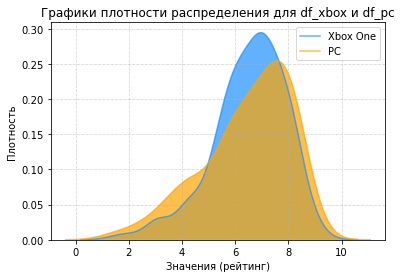

In [25]:
# Проверка гипотезы 1
df_xbox = df1[df1['platform'] == 'XOne']['user_score']
df_pc = df1[df1['platform'] == 'PC']['user_score']

# Описание выборок
print('Размер выборки df_xbox', len(df_xbox))
print('Дисперсия выборки df_xbox', np.var(df_xbox))
print('Среднее значение df_xbox', df_xbox.mean())
print()
print('Размер выборки df_pс', len(df_pc))
print('Дисперсия выборки df_pc',np.var(df_pc))
print('Среднее значение df_pc', df_pc.mean())

sns.kdeplot(df_xbox, shade=True, color="dodgerblue", label="Xbox One", alpha=.7)
sns.kdeplot(df_pc, shade=True, color="orange", label="PC", alpha=.7)
plt.title('Графики плотности распределения для df_xbox и df_pc')
plt.legend()
plt.xlabel("Значения (рейтинг)")
plt.ylabel("Плотность")
plt.grid(linestyle='--', alpha=.5)
plt.show()

In [26]:
results = st.ttest_ind(
    df_xbox, 
    df_pc,
    equal_var=False) 

print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

P-value: 0.6815518683229996
Нет оснований отвергнуть нулевую гипотезу


Размер выборки df_action 555
Дисперсия выборки df_action 1.9749440467494535
Среднее значение df_action 6.8227027027027125

Размер выборки df_sports 201
Дисперсия выборки df_sports 3.102496967896834
Среднее значение df_sports 5.5184079601990055


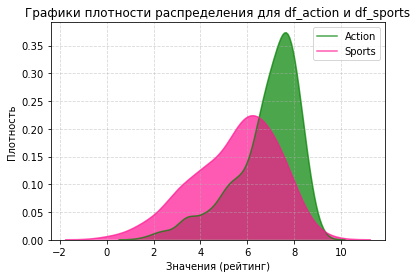

In [27]:
# Проверка гипотезы 2
df_action = df1[df1['genre'] == 'Action']['user_score']
df_sports = df1[df1['genre'] == 'Sports']['user_score']

# Описание выборок
print('Размер выборки df_action', len(df_action))
print('Дисперсия выборки df_action', np.var(df_action))
print('Среднее значение df_action', df_action.mean())
print()
print('Размер выборки df_sports', len(df_sports))
print('Дисперсия выборки df_sports',np.var(df_sports))
print('Среднее значение df_sports', df_sports.mean())

sns.kdeplot(df_action, shade=True, color="g", label="Action", alpha=.7)
sns.kdeplot(df_sports, shade=True, color="deeppink", label="Sports", alpha=.7)
plt.title('Графики плотности распределения для df_action и df_sports')
plt.legend()
plt.xlabel("Значения (рейтинг)")
plt.ylabel("Плотность")
plt.grid(linestyle='--', alpha=.5)
plt.show()

In [28]:
results2 = st.ttest_ind(
    df_action, 
    df_sports,
    equal_var=False) 

print('P-value:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

P-value: 1.114845724240078e-18
Отвергаем нулевую гипотезу


Проведенный анализ позволяет сделать следующие выводы:

* На 5% уровне значимости принимается гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC(Personal computer).
* На 5% уровне значимости принимается гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.  

## 6. Общий вывод <a id="six"></a>

* В датафрейме содержится информация о продажах игр с 1980 по 2016 год. До 2008 кол-во выпускаемых игр в год росло практически по экспоненте. Однако после пика 2008-2009 годов, когда ежегодно выпускалось более 1400 новых игр, наблюдается резкое падение. С 2012 года количество ежегодно выпускаемых игр варьируется около 600.

    
*  Высокие темпа развития игровых технологий обуславливают относительно короткие сроки популярности отдельных игровых платформ. Так, смена популярных на рынке игровых платформ происходит примерно раз в 5 лет.
    
    
*  Для целей прогнозирования спроса на рынке в 2017 году нецелесообразно использовать данные до 2012 года.
    
    
*	Как правило, платформы sony занимают лидирующие позиции по объемам игровых продаж. Второе место сохраняют за собой приставки Microsoft. На текущий момент на рынке доминируют 2 консоли: PS4 и Xbox One, однако отрицательная динамика объемов продаж на них, заметная с начала 2015 года, свидетельствует о скором выпуске нового поколения приставок.

    
*	Объемы продаж игры в среднем существенно не различаются для разных платформ. Однако распределения объемов продаж по всем платформам скошены вправо, что свидетельствую о наличии большого количества игр с объемами продаж ощутимо больше медианной суммы. При этом для крупных платформ (sony и xbox) разброс значений игровых продаж значительно шире, чем для иных консолей.

    
*	Примечательно, что на всех топовых платформах оценки критиков и игроков, как правило, не оказываю существенного влияния на объемы продаж игры. В то же время игры с большими объемами продаж преимущественно характеризуются также и высокими оценками со стороны критиков.

    
*	Как наиболее прибыльными, так и наиболее распространенными являются игры в жанрах Action, Shooter, Role-Playing	и Sports. При этом шутеры лидируют по показатели объемов продаж на одну игру.

    
*	Предпочтения пользователей различный регионов как в отношении платформ, так и в отношении игровых жанров существенно отличаются. Наибольшей спецификой обладает рынок Японии.
    

*	В Европе и Северной Америке в топ-5 популярных платформ, как и в целом по всему миру, входят консоли sony и xbox. Однако в Японии лидирующие позиции на рынке занимает портативная консоль Nintendo 3DS, при этом существенно ниже распространенность xbox (приставки Microsoft даже не входят в топ-5).
      
      
*	Около 60% рынка игр в Европе и Северной Америке приходится на жанры Action, Shooter	и Sports, популярные в целом во всем мире. Жанр Action также весьма популярен в Японии. На ряду с ним японских пользователей привлекают игры жанров Role-Playing и Simulation.	

      
*	В целом, игры, которым присвоен ESRB рейтинг "M", продаются более успешно, однако влияние данного рейтинга на продажи невелико. Так, на рынке Японии соответствующей закономерности не наблюдается. 
    
    
*   На 5% уровне значимости принимается гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC(Personal computer).

        
*   На 5% уровне значимости принимается гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.
    
***Результаты проведенного анализа свидетельствуют о том, что при планировании рекламных акций на 2017 год целесообразно обратить внимание на игры в жанре Action, Shooter, Role-Playing и Sports для приставок PS4 и Xbox One. При этом для рынка Японии рекламная стратегия должна существенно отличаться и делать больший акцент на играх для портативной консоли Nintendo 3DS. Также стоит иметь в виду, что в ближайшие 3-4 года можно ожидать выхода приставок нового поколения.***
